# Задание
### Основная часть
* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly
### Дополнительная часть
* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_excel('domrf.xlsx')

In [3]:
df.head(2)

,Unnamed: 0,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,0,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,13399,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
uniq_data_dict = {}
for column_name in df.columns:
    uniq_data_dict[column_name] = df[column_name].unique().tolist()

In [5]:
uniq_data_dict

{'Unnamed: 0': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  15

* id - id объекта
* pdId - id объекта
* region - регион, где находится объект
* address - адрес местоположения объекта
* floorMin - самый нижний этаж
* floorMax - самый верхний этаж
* objElemLivingCnt - количество жилых помещений
* objReady100PercDt - дата полной готовности объекта
* wallMaterialShortDesc - материал стен здания
* objLkFinishTypeDesc - тип готовности помещения
* objLkFreePlanDesc - поддерживается ли свободная планировка
* objElemParkingCnt
* objSquareLiving - площадь жилого помещения
* rpdNum - номер проектной декларации
* rpdPdfLink - ссылка на пдф файл с проектной декларацией
* rpdIssueDttm - дата создания проектной декларации
* objLkLatitude - широта нахождения объекта
* objLkLongitude - долгота нахождения объекта
* objCompensFundFlg
* objProblemFlg
* objLkClassDesc
* loadDttm - дата загрузки информации
* photoRenderDTO - информация о фото объекта
* objGuarantyEscrowFlg - гарантия по договору эскроу
* objectType - тип объекта
* miniUrl - ссылка на фото объекта
* residentialBuildings
* newBuildingId - id объекта
* objFloorCnt - этаж помещения
* objFlatCnt - номер квартиры
* objFlatSq - площадь квартиры
* objNonlivElemCnt - количество нежилых помещений
* objStatus - статус объекта
* isAvailableWantLiveHere
* objTransferPlanDt
* objLivCeilingHeight - высота жилого помещения
* objInfrstrBicycleLaneFlg - наличие велосипедной дорожки
* objInfrstrPlaygrndCnt - наличие детской площадки
* objInfrstrSportGroundCnt - наличие спортивной площадки
* objInfrstrTrashAreaCnt - количество баков под мусор
* objInfrstrObjPrkngCnt - количество парковочных мест
* objInfrstrNotObjPrkngCnt - количество парковочных мест вне ЖК
* objInfrstrRampFlg - наличие пандуса
* objInfrstrCurbLoweringFlg - наличие снижающегося бордюра
* objElevatorWheelchairCnt - количество подъемников для инвалидного кресла
* objElevatorPassengerCnt - количество пассажирских лифтов
* objElevatorCargoCnt - количество грузовых лифтов
* soldOutPerc
* objPriceAvg - стоимость объекта
* generalContractorNm
* nonlivFirstFloor - жилой первый этаж или нет
* objectTransportInfo - информация о наличии трпанспортных развязок 
* conclusion - решение
* objLkSaleDepEmail - email для обращения о покупке объекта
* objGreenHouseFlg - является ли объект экологически чистым
* objEnergyEffShortDesc - коэффициент энергетической эффективности объекта
* infrastructureIndexValue
* developer.devId - id компании застройщика
* developer.devShortCleanNm - краткое наименование компании застройщика
* developer.devShortNm
* developer.devFullCleanNm - полное наименование компании застройщика
* developer.problObjCnt
* developer.buildObjCnt
* developer.comissObjCnt
* developer.regRegionDesc - регион регистрации компании застройщика
* developer.devPhoneNum - телефонный номер компании застройщика
* developer.devSite - сайт компании застройщика
* developer.devEmail - email компании застройщика 
* developer.devInn - ИНН компании застройщика
* developer.devOgrn - ОГРН компании застройщика
* developer.devKpp -КПП компании застройщика 
* developer.devLegalAddr - фактический адрес нахождения компании застройщика
* developer.devFactAddr 
* developer.lastRpdId 
* developer.fundGuarantyFlg 
* developer.devOrgRegRegionCd
* developer.devEmplMainFullNm - ФИО представителя компании застройщика
* developer.developerGroupName - название организации застройщика
* developer.orgForm.id - id организационной форма компании застройщика
* developer.orgForm.fullForm - полная форма наименования компании застройщика
* developer.orgForm.shortForm - краткая форма наименования компании застройщика
* developer.companyGroupId
* developer.objGuarantyEscrowFlg - есть ли гарантии пор договорам эскроу
* developer.govFundFlg
* quartography.objLivElem1KCnt
* quartography.objLivElem2KCnt
* quartography.objLivElem3KCnt
* quartography.objLivElem4KCnt
* quartography.objLivElemCnt
* quartography.objLivElemEntrCnt
* quartography.objLivElemEntrFloorAvg
* nameObj - наименование объекта
* transportDistIndex - расстояние от транспорта
* transportDistIndexValue
* metro.id - id станции метро
* metro.name - наименование станции метро
* metro.line - наименование ветки метро
* metro.color - цвет ветки метро
* metro.time - время до метро
* metro.isWalk
* metro.colors - цвета ближайших веток метро
* greenAreaIndexValue - индекс "экологичности" окружающей площади
* airQualityIndexValue - качество воздуха
* complexShortNm - краткое наименование ЖК
* developer.bankruptStage.bankruptStageCd
* developer.bankruptStage.bankruptStageDesc
* developer.bankruptStage.bankruptLawUrl
* developer.orgBankruptMsgDttm - дата признания компании застройщика банкротом

In [ ]:
количество объектов в колонке , если 1 - удалить, если 2-3 - посмотреть что удалдить

In [ ]:
{'pdId': 'id объекта',
'region' : 'регион, где находится объект',
'address' : 'адрес местоположения объекта',
'floorMin' : 'самый нижний этаж',
'floorMax' : 'самый верхний этаж',
'objElemLivingCnt'  : 'количество жилых помещений',
'objReady100PercDt' : 'дата полной готовности объекта',
'wallMaterialShortDesc' : 'материал стен здания',
'objLkFinishTypeDesc' : 'тип готовности помещения',
'objLkFreePlanDesc' : 'поддерживается ли свободная планировка',
'objElemParkingCnt' : 'количество парковочных мест',
'objSquareLiving' : 'площадь жилого помещения',
objLkLatitude - широта нахождения объекта
objLkLongitude - долгота нахождения объекта
objGuarantyEscrowFlg - гарантия по договору эскроу
objectType - тип объекта
residentialBuildings
newBuildingId - id объекта
objFloorCnt - этаж помещения
objFlatCnt - номер квартиры
objFlatSq - площадь квартиры
objNonlivElemCnt - количество нежилых помещений
objStatus - статус объекта
objTransferPlanDt
objLivCeilingHeight - высота жилого помещения
objInfrstrBicycleLaneFlg - наличие велосипедной дорожки
objInfrstrPlaygrndCnt - наличие детской площадки
objInfrstrSportGroundCnt - наличие спортивной площадки
objInfrstrTrashAreaCnt - количество баков под мусор
objInfrstrObjPrkngCnt - количество парковочных мест
objInfrstrNotObjPrkngCnt - количество парковочных мест вне ЖК
objInfrstrRampFlg - наличие пандуса
objInfrstrCurbLoweringFlg - наличие снижающегося бордюра
objElevatorWheelchairCnt - количество подъемников для инвалидного кресла
objElevatorPassengerCnt - количество пассажирских лифтов
objElevatorCargoCnt - количество грузовых лифтов
soldOutPerc
objPriceAvg - стоимость объекта
nonlivFirstFloor - жилой первый этаж или нет
objectTransportInfo - информация о наличии трпанспортных развязок
conclusion - решение
objLkSaleDepEmail - email для обращения о покупке объекта
objGreenHouseFlg - является ли объект экологически чистым
objEnergyEffShortDesc - коэффициент энергетической эффективности объекта
infrastructureIndexValue
developer.devId - id компании застройщика
developer.devShortCleanNm - краткое наименование компании застройщика
developer.devShortNm
developer.fundGuarantyFlg
developer.devOrgRegRegionCd
developer.devEmplMainFullNm - ФИО представителя компании застройщика
developer.developerGroupName - название организации застройщика
developer.orgForm.id - id организационной форма компании застройщика
developer.orgForm.fullForm - полная форма наименования компании застройщика
developer.orgForm.shortForm - краткая форма наименования компании застройщика
developer.companyGroupId
developer.objGuarantyEscrowFlg - есть ли гарантии по договорам эскроу
quartography.objLivElemEntrFloorAvg
nameObj - наименование объекта
transportDistIndex - расстояние от транспорта
transportDistIndexValue
metro.id - id станции метро
metro.name - наименование станции метро
metro.line - наименование ветки метро
metro.color - цвет ветки метро
metro.time - время до метро
metro.isWalk
metro.colors - цвета ближайших веток метро
greenAreaIndexValue - индекс "экологичности" окружающей площади
airQualityIndexValue - качество воздуха
complexShortNm - краткое наименование ЖК
developer.orgBankruptMsgDttm - дата признания компании застройщика банкротом}

In [6]:
for key in uniq_data_dict.keys():
    if len(uniq_data_dict[key])<2:
        print(key)

objProblemFlg
loadDttm
objectType
objStatus
isAvailableWantLiveHere


In [7]:
df.shape

(1000, 109)

In [8]:
df =df.drop(['objProblemFlg',
'loadDttm',
'objectType',
'objStatus',
'isAvailableWantLiveHere'], axis=1)

In [9]:
df.shape

(1000, 104)

In [10]:
len(df['region'].unique())

59

In [ ]:
lineplot

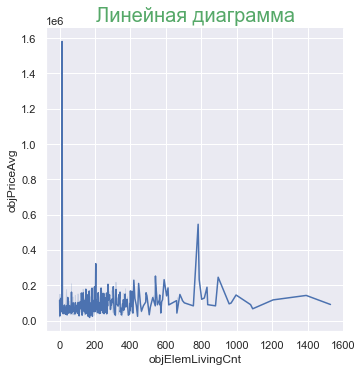

In [12]:
sns.set(style='darkgrid')  

sns.relplot(
    x='objElemLivingCnt', 
    y='objPriceAvg', 
    data= df,
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

In [ ]:
линейные диаграммы с отношением один ко многим

In [11]:
sns.relplot(
    x='Month', 
    y='Smoothies', 
    data=snacks_sales, 
    kind='line')
plt.title('Линейная диаграмма', size=20, color='g');

NameError: name 'snacks_sales' is not defined